In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
import random

In [2]:
# Step 1: Generate data for sales of products over four years

def random_dates(start_date, end_date, n=200000):
    date_range = (end_date - start_date).days
    random_dates1 = [start_date + timedelta(days=np.random.randint(date_range)) for _ in range(n)]
    return sorted(random_dates1)[:200000]  


In [25]:
def generate_complex_retail_data(start_date, end_date, products=['smartphones', 'laptops', 'headphones','Smartwatches','Televisions ','Tablets','Washing machin','Freez','Induction','DVD player']):
    dates = random_dates(start_date, end_date, n=20000)  # Simulate data for one year

    data = []
    for product in products:
        base_sales = np.random.randint(50000, 150000)
        trend = np.linspace(0, 20000, len(dates)) + np.random.normal(0, 50000, len(dates))
        seasonality = 10 * np.sin(np.arange(len(dates)) * (2 * np.pi / 1098))
        random_noise = np.random.normal(0, 4000, len(dates))
        sales = base_sales + trend + seasonality + random_noise

        product_cost = np.random.randint(1000, 20001)  # Random cost within range 1000 to 20000
        product_data = {'Date': dates, 'Product': [product] * len(dates), 'Sales': sales, 'Cost': [product_cost] * len(dates)}
        data.append(pd.DataFrame(product_data))

    return pd.concat(data, ignore_index=True)

In [26]:
start_date = datetime(2019, 1, 1)
end_date = datetime(2023, 12, 31)


In [49]:
products= ['smartphones', 'laptops', 'headphones', 'Smartwatches', 'Televisions ', 'Tablets','Washing machin']


In [50]:
complex_retail_dataset = generate_complex_retail_data(start_date, end_date, products=product_names)

In [51]:
complex_retail_dataset.to_csv('sales_data', index=False)

In [52]:
df= pd.read_csv('sales_data')

In [53]:
df

,Date,Product,Sales,Cost
0,2019-01-01,smartphones,91860.780189,14737
1,2019-01-01,smartphones,28189.998377,14737
2,2019-01-01,smartphones,-17562.167009,14737
3,2019-01-01,smartphones,793.524966,14737
4,2019-01-01,smartphones,25067.900531,14737
...,...,...,...,...
199995,2023-12-30,DVD player,185937.948311,6973
199996,2023-12-30,DVD player,152654.561426,6973
199997,2023-12-30,DVD player,145616.837287,6973
199998,2023-12-30,DVD player,87962.076035,6973


In [54]:

# Aggregate sales data for duplicate entries
df_agg = df.groupby(['Product', 'Date'])['Sales'].sum().reset_index()

# Pivot the table to have 'Product' as index, 'Date' as columns, and 'Sales' as values
df_pivot = df_agg.pivot(index='Product', columns='Date', values='Sales')

# Fill missing values with 0
df_pivot.fillna(0, inplace=True)

# Convert the dataset to a time series
time_series = df_pivot.values.T

# Print the preprocessed dataset
print(df_pivot.head())

Date            2019-01-01     2019-01-02    2019-01-03    2019-01-04  \
Product                                                                 
DVD player    1.214200e+06  511430.270419  2.514999e+06  1.154834e+06   
Freez         1.025511e+06  480293.751225  1.481026e+06  6.070713e+05   
Induction     1.004724e+06  422773.654421  9.231699e+05  9.607033e+05   
Smartwatches  2.146362e+06  797392.017151  2.596419e+06  1.990698e+06   
Tablets       7.589478e+05  673801.533265  1.510214e+06  1.131214e+06   

Date            2019-01-05     2019-01-06    2019-01-07     2019-01-08  \
Product                                                                  
DVD player    1.565997e+06  443098.949185  8.889393e+05  563680.408595   
Freez         7.624645e+05  415544.855679  9.227465e+05  389471.344387   
Induction     9.580632e+05  566192.494377  6.351474e+05  538417.448362   
Smartwatches  2.189356e+06  710423.716078  1.250164e+06  865375.286039   
Tablets       1.201799e+06  728476.213385  4

Forecasting for smartphones
ARIMA RMSE: 0.3052535029738642


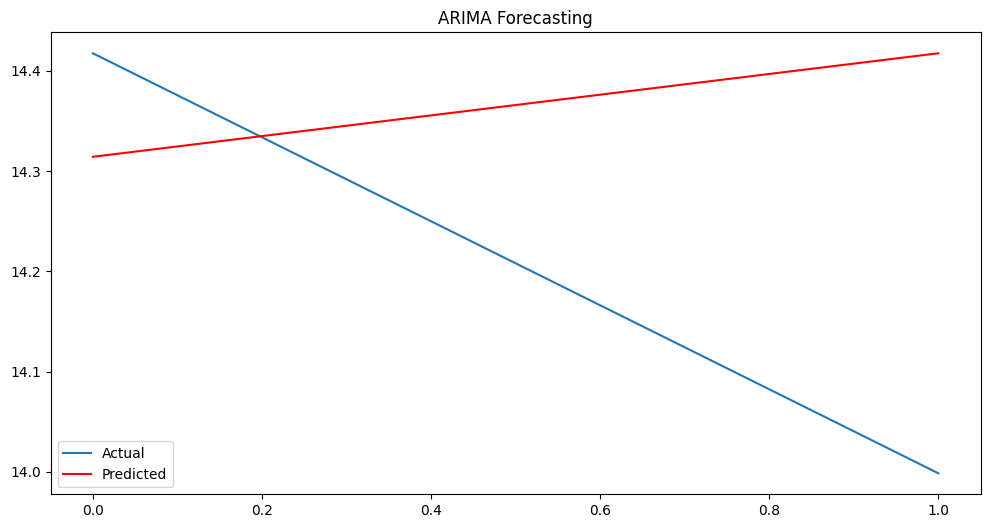

Forecasting for laptops
ARIMA RMSE: 0.5423304216472334


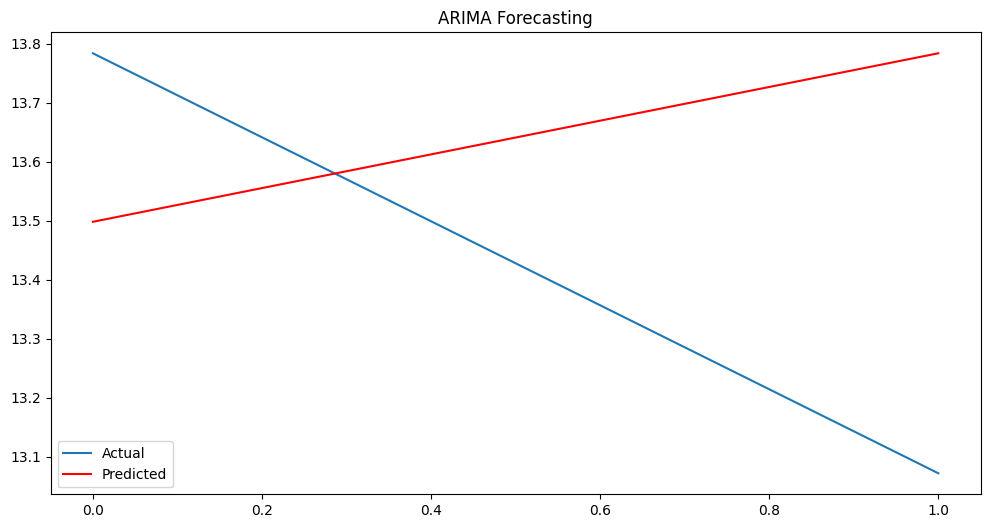

Forecasting for headphones
ARIMA RMSE: 0.11662075374053268


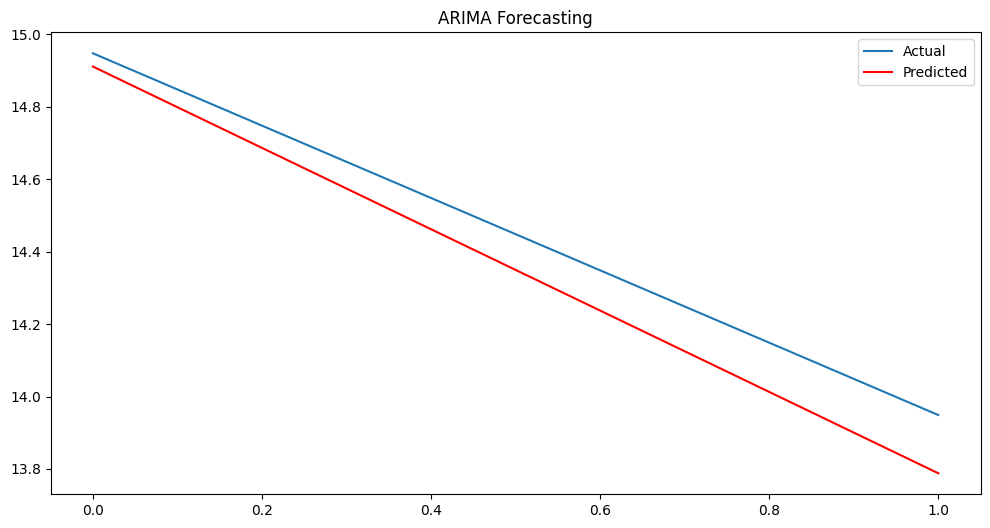

Forecasting for Smartwatches
ARIMA RMSE: 0.31923262609196495


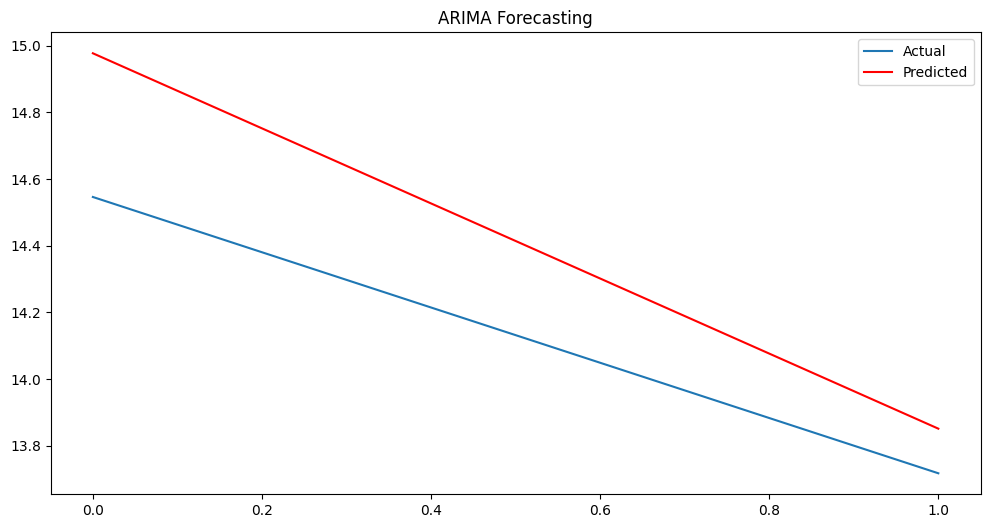

Forecasting for Televisions 
ARIMA RMSE: 0.24503653032305012


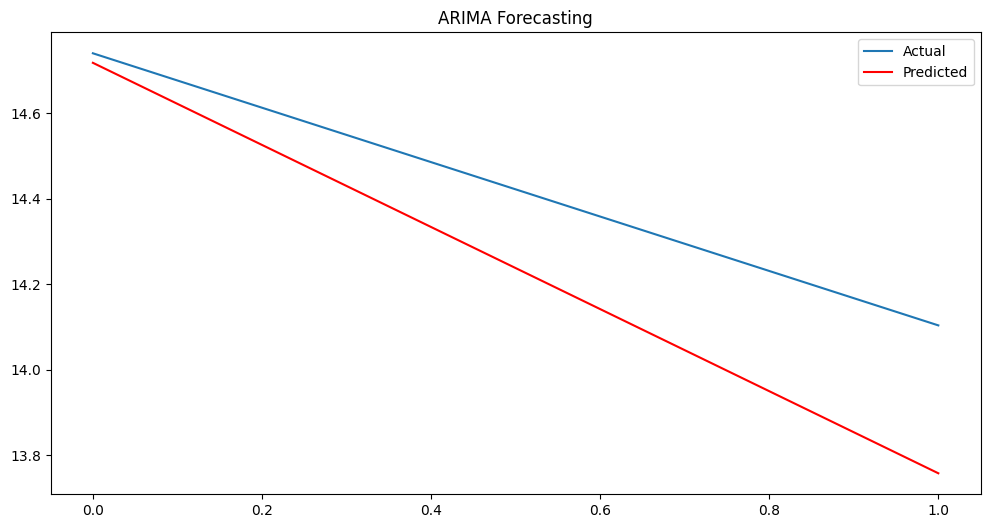

Forecasting for Tablets
ARIMA RMSE: 2.4407546537369504


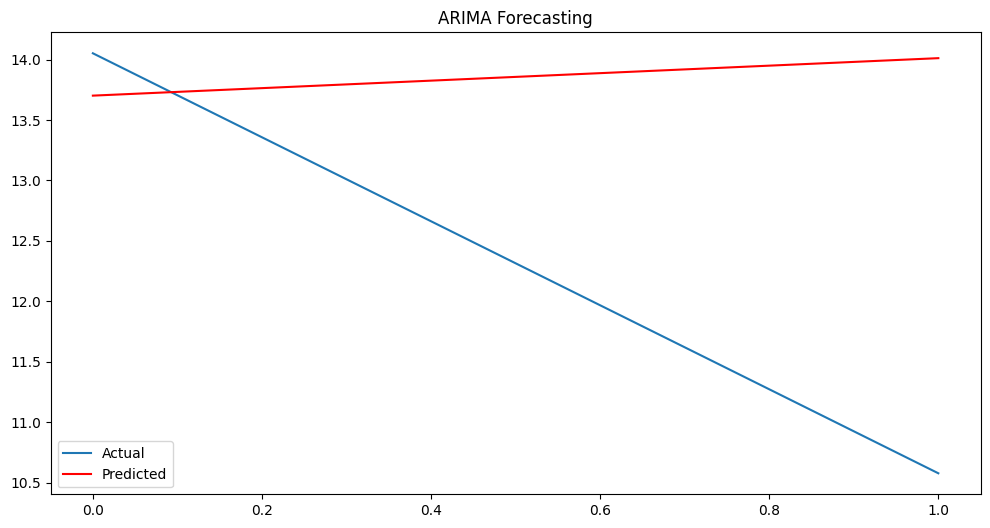

Forecasting for Washing machin
ARIMA RMSE: 0.8129428797585088


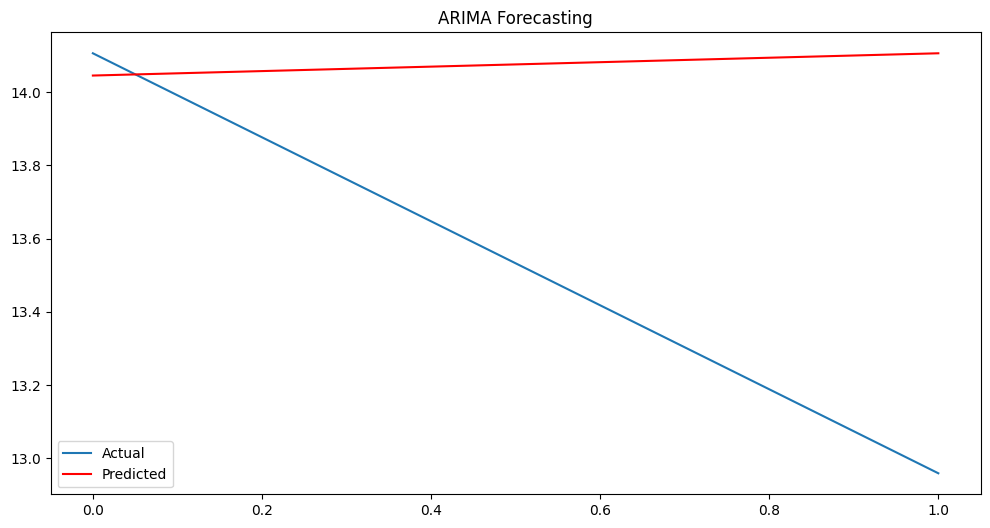

In [87]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define a function to fit ARIMA model and make predictions
def arima_forecast(data, order):
    # Split data into train and test sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    history = [x for x in train]
    predictions = []

    # Fit ARIMA model and make predictions
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate RMSE
    rmse3 = mean_squared_error(test, predictions, squared=False)
    print('ARIMA RMSE:', rmse3)

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.title('ARIMA Forecasting')
    plt.legend()
    plt.show()

# Example usage
for i, product in enumerate(products):
    print(f"Forecasting for {product}")
    # Apply log transformation to data
    log_data = np.log1p(time_series[i])
    arima_forecast(log_data, order=(5, 1, 0))  # ARIMA order=(p,d,q)


Forecasting for smartphones
Exponential Smoothing RMSE: 576689.2305623982


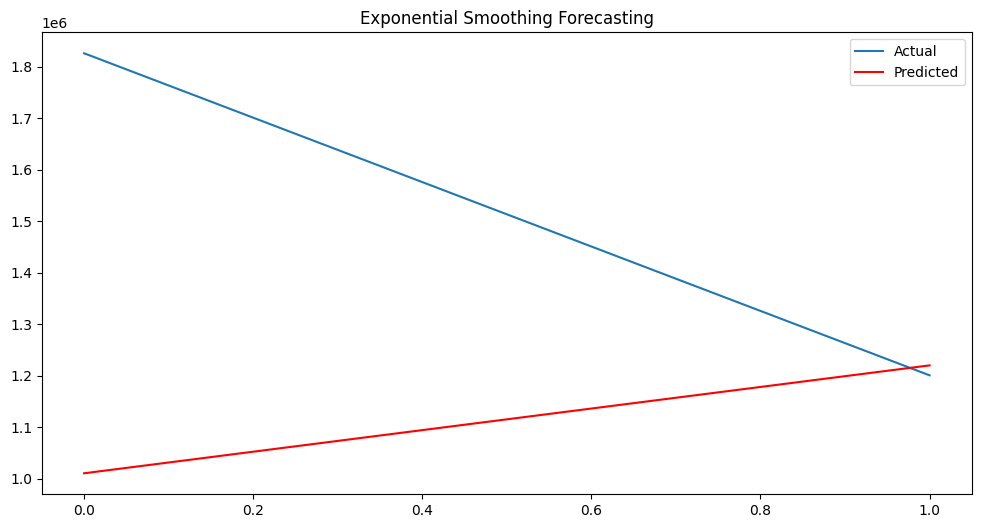

Forecasting for laptops
Exponential Smoothing RMSE: 369470.5198265937


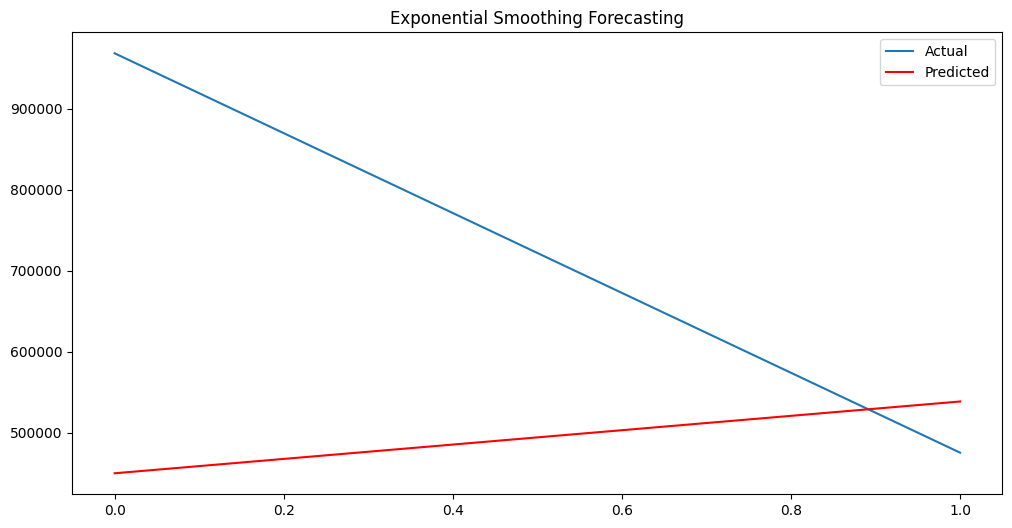

Forecasting for headphones
Exponential Smoothing RMSE: 1821322.573774122


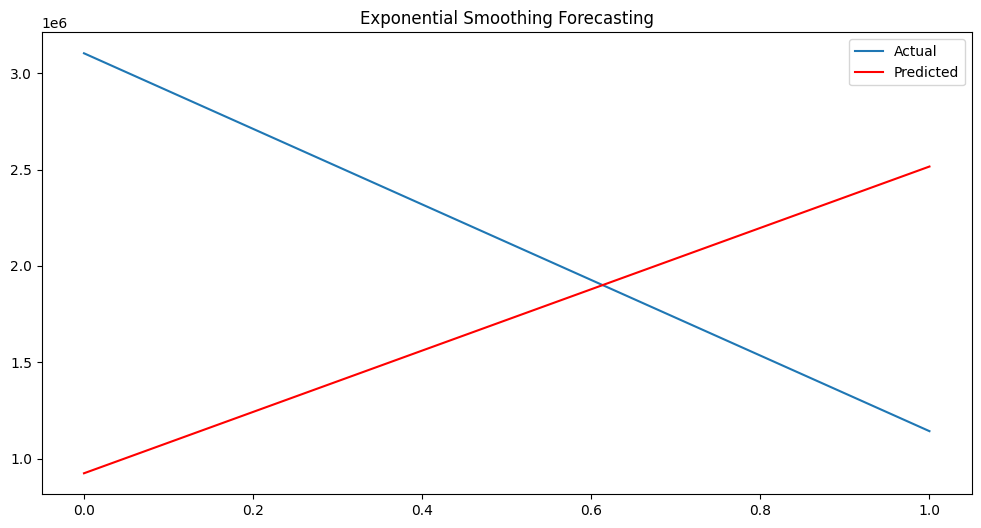

Forecasting for Smartwatches
Exponential Smoothing RMSE: 682048.801830827


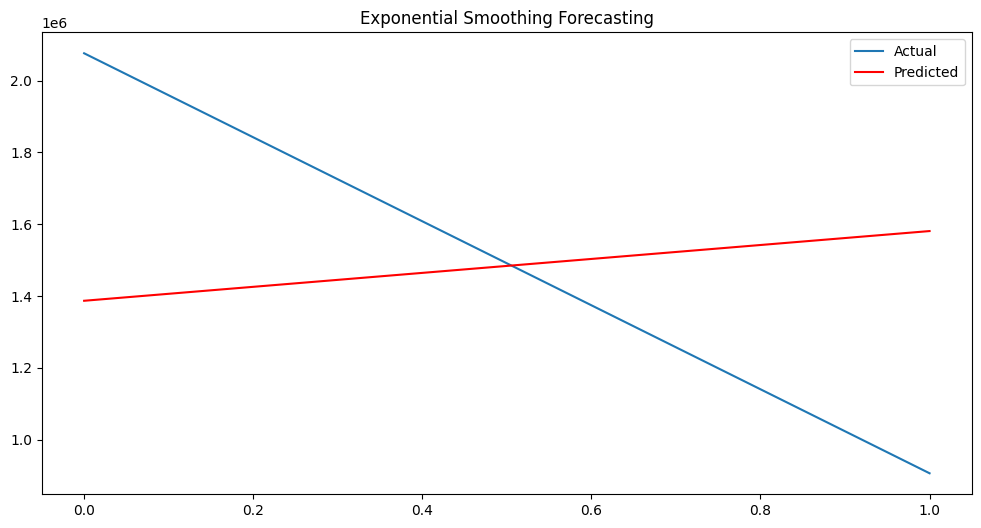

Forecasting for Televisions 
Exponential Smoothing RMSE: 1061175.0410644189


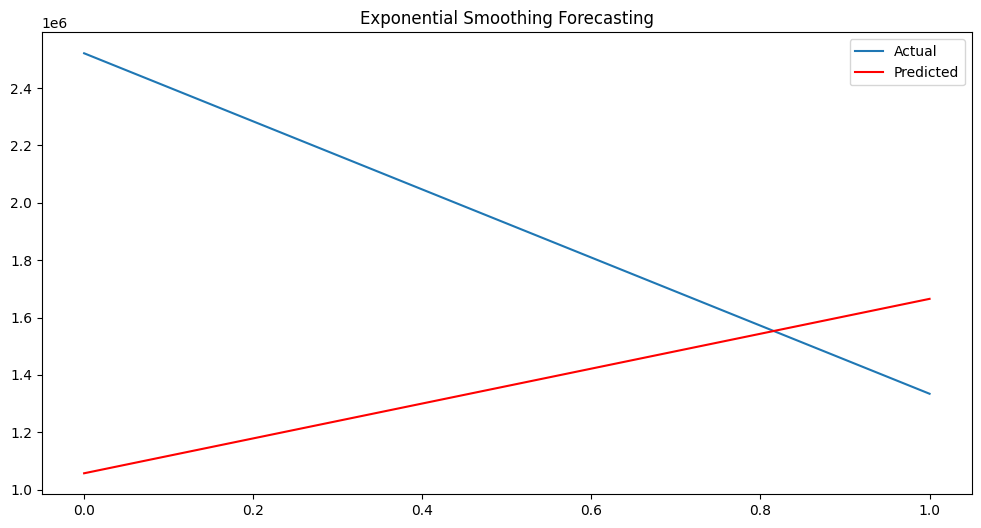

Forecasting for Tablets
Exponential Smoothing RMSE: 609341.8430397799


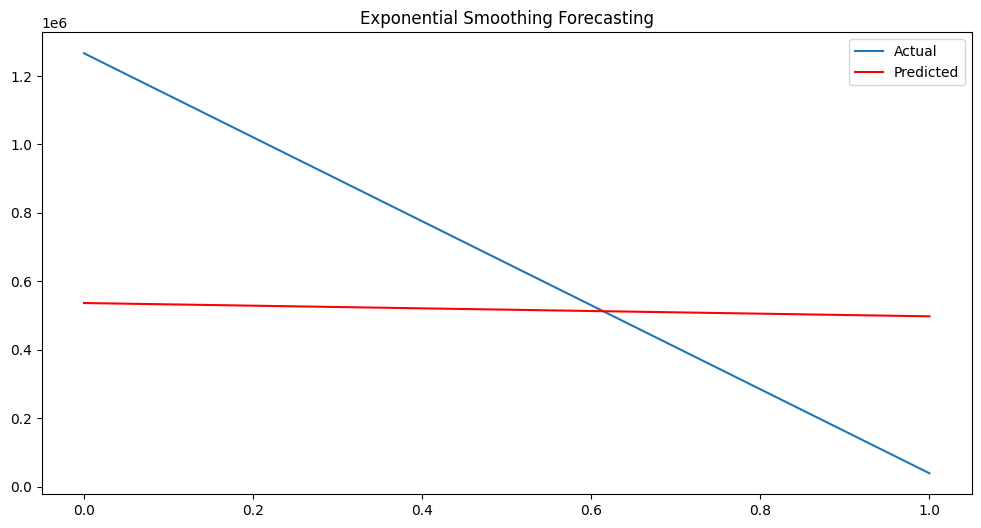

Forecasting for Washing machin
Exponential Smoothing RMSE: 593998.0505750004


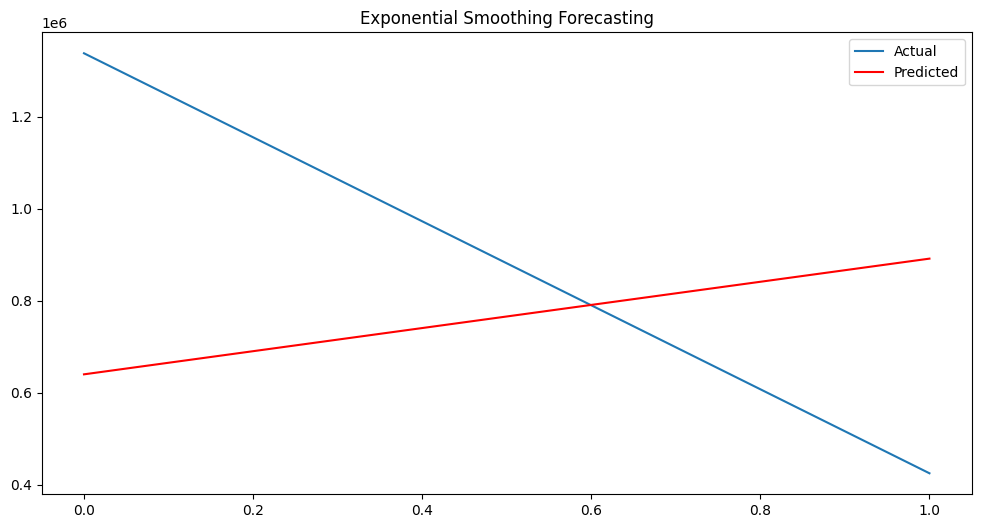

In [82]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define a function to fit Exponential Smoothing model and make predictions
def exp_smoothing_forecast(data):
    # Split data into train and test sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    
    # Try different seasonal periods
    try:
        model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=6)
        model_fit = model.fit()
        predictions = model_fit.forecast(len(test))
    except ValueError:
        model = ExponentialSmoothing(train, seasonal='add', seasonal_periods=3)
        model_fit = model.fit()
        predictions = model_fit.forecast(len(test))
    
    # Calculate RMSE
    rmse1 = mean_squared_error(test, predictions, squared=False)
    print('Exponential Smoothing RMSE:', rmse1)

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.title('Exponential Smoothing Forecasting')
    plt.legend()
    plt.show()

# Example usage
for i, product in enumerate(products):
    print(f"Forecasting for {product}")
    exp_smoothing_forecast(time_series[i])


Forecasting for smartphones
SARIMA RMSE: 526552.7853963758


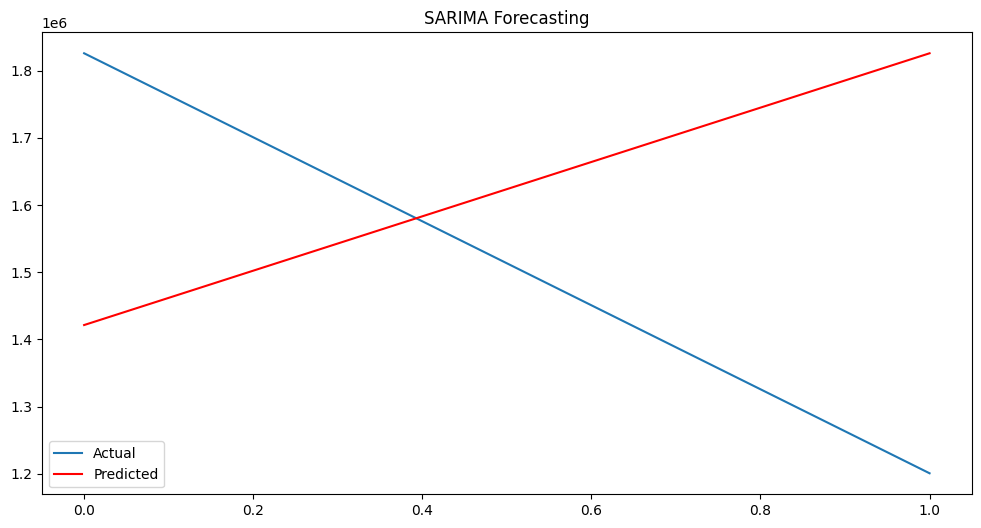

Forecasting for laptops
SARIMA RMSE: 464074.701886704


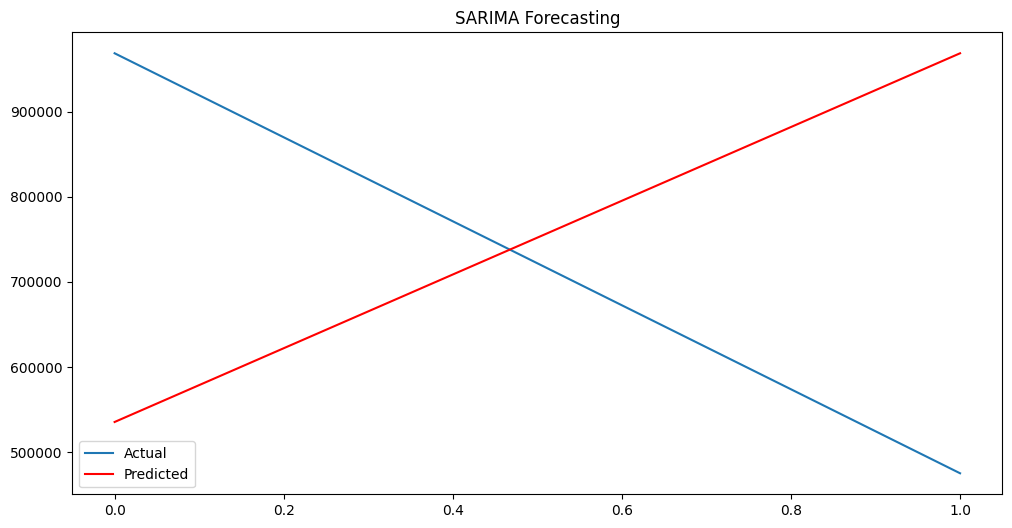

Forecasting for headphones
SARIMA RMSE: 1633176.2091653468


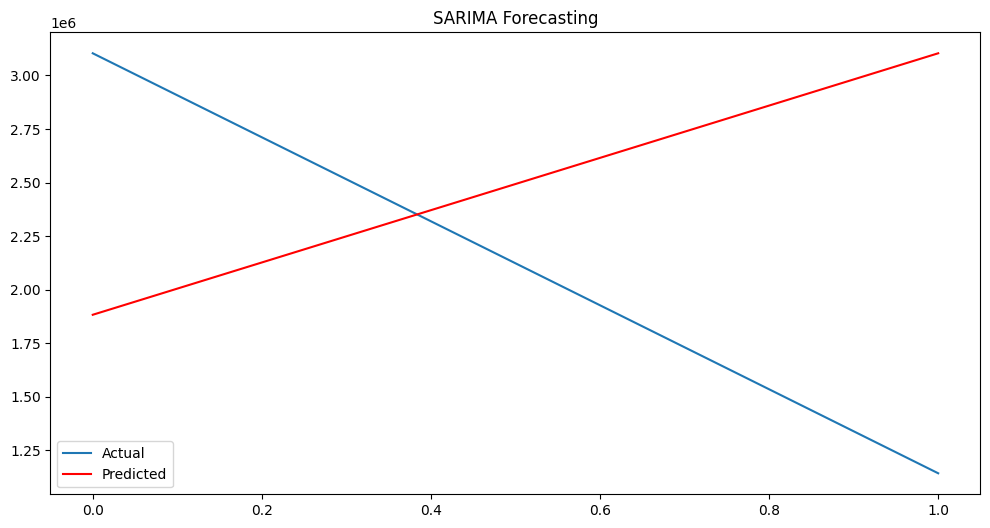

Forecasting for Smartwatches
SARIMA RMSE: 936474.6190288352


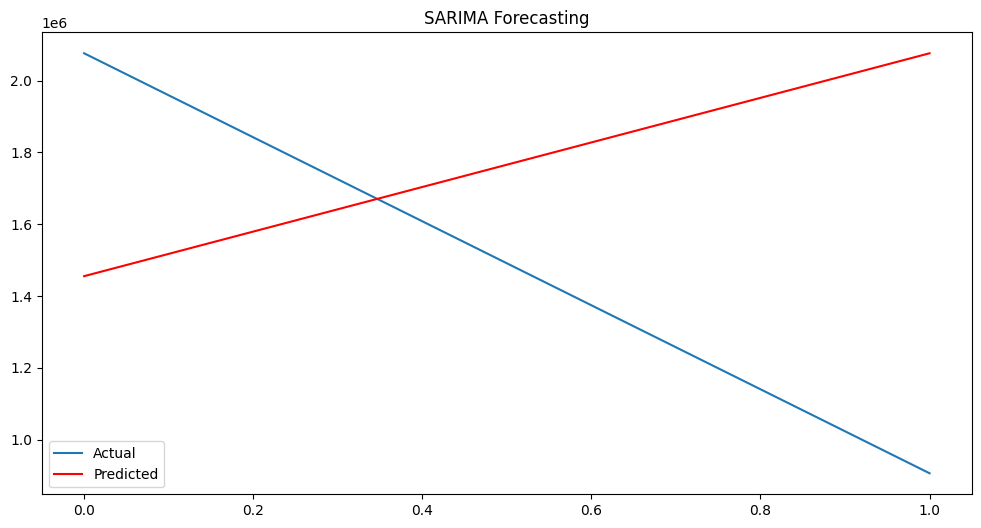

Forecasting for Televisions 
SARIMA RMSE: 1076549.6524801534


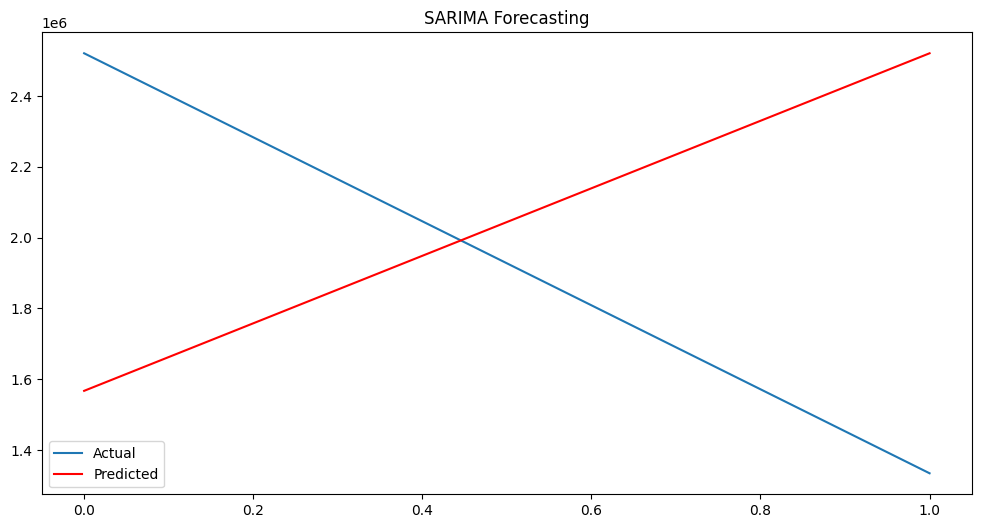

Forecasting for Tablets
SARIMA RMSE: 958232.901605966


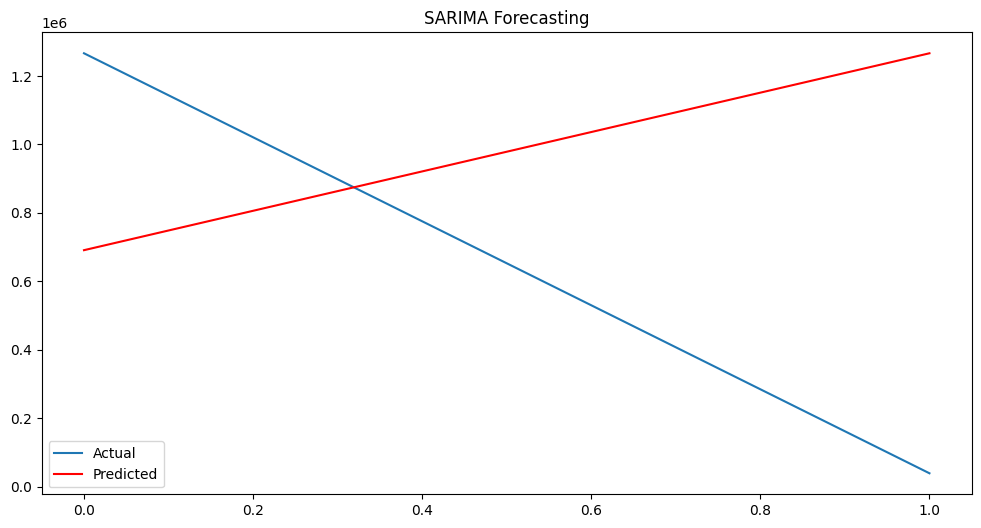

Forecasting for Washing machin
SARIMA RMSE: 815992.0737122432


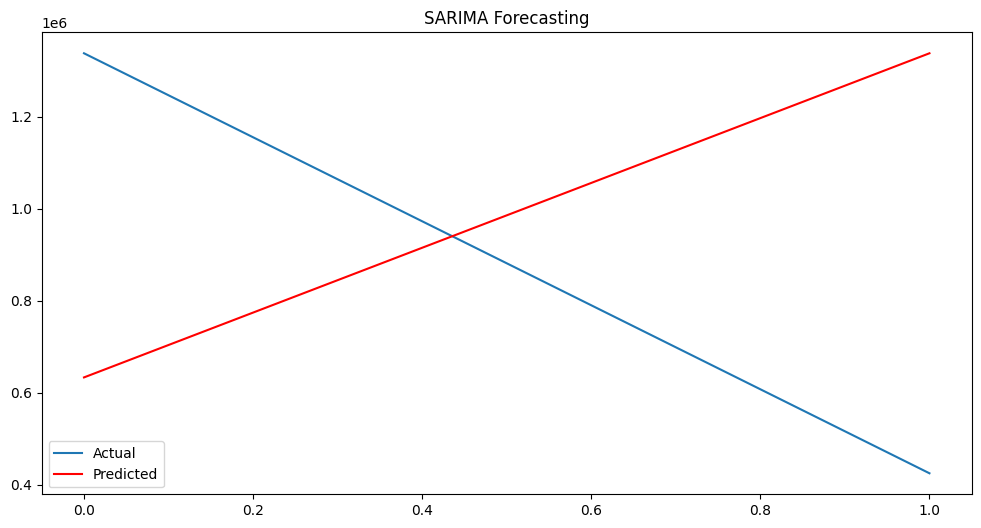

In [81]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Define a function to fit SARIMA model and make predictions
def sarima_forecast(data, order, seasonal_order):
    # Split data into train and test sets
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]
    history = [x for x in train]
    predictions = []

    # Fit SARIMA model and make predictions
    for t in range(len(test)):
        model = SARIMAX(history, order=order, seasonal_order=seasonal_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate RMSE
    rmse2 = mean_squared_error(test, predictions, squared=False)
    print('SARIMA RMSE:', rmse2)

    # Plot predictions
    plt.figure(figsize=(12, 6))
    plt.plot(test, label='Actual')
    plt.plot(predictions, color='red', label='Predicted')
    plt.title('SARIMA Forecasting')
    plt.legend()
    plt.show()

# Example usage
for i, product in enumerate(products):
    print(f"Forecasting for {product}")
    sarima_forecast(time_series[i], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12))  # SARIMA order=(p,d,q), seasonal_order=(P,D,Q,s)


In [95]:
RMSE={
     'products': ['smartphones', 'laptops', 'headphones', 'Smartwatches', 'Televisions ', 'Tablets','Washing machin'],
     'ARIMA_RMSE':[0.3052, 0.5423,0.1164,0.3192,0.2450,2.4407,0.8129],
     'Exp_Smoothing_RMSE':[576689.23,369470.51,1821322,682048.80,1061175,609341,593998],
     'SARIMA_RMSE':[526552,464074,1633176,936474,1076549,958232,815992]
     }


RMSE1= pd.DataFrame(RMSE)


In [97]:
print("RMSE of all model:")
print(RMSE1)

RMSE of all model:
         products  ARIMA_RMSE  Exp_Smoothing_RMSE  SARIMA_RMSE
0     smartphones      0.3052           576689.23       526552
1         laptops      0.5423           369470.51       464074
2      headphones      0.1164          1821322.00      1633176
3    Smartwatches      0.3192           682048.80       936474
4    Televisions       0.2450          1061175.00      1076549
5         Tablets      2.4407           609341.00       958232
6  Washing machin      0.8129           593998.00       815992
